In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
demographic_data = "resources/Demographics.csv"
birth_data = "resources/Birth_Statistics.csv"
cancer_data = "resources/Cancer_Rates.csv"
hospital_data = "resources/Hospitalization_Discharge_Rates.csv"
health_data = "resources/LakeCounty_Health.csv"
mortality_data = "resources/Mortality_Rates.csv"
obesity_data = "resources/Obesity_Percentages.csv"


# Read the demographics data and the study results
county_demographic_data = pd.read_csv(demographic_data)
county_birth_data = pd.read_csv(birth_data)
county_cancer_data = pd.read_csv(cancer_data)
county_hospital_data = pd.read_csv(hospital_data)
county_mortality_data = pd.read_csv(mortality_data)
county_obesity_data = pd.read_csv(obesity_data)



In [2]:
# Read and study cancer data
county_cancer_data = pd.read_csv(cancer_data)
county_cancer_data.head()

,FID,ZIP,Colorectal,Lung_Bronc,Breast_Can,Prostate_C,Urinary_Sy,All_Cancer,SHAPE_Length,SHAPE_Area
0,1,60002,218.062127,419.666735,399.094836,259.205925,259.205925,2703.147501,215525.155184,1.149062e+09
1,2,60010,258.915706,335.464697,504.322767,499.819885,227.395533,3248.829251,178637.109618,8.027354e+08
2,3,60015,153.435867,230.153801,478.573777,442.041428,222.847331,2922.587952,111400.890558,3.674576e+08
3,4,60020,292.797189,507.515128,214.717939,302.557095,370.876440,3084.130392,92363.084625,1.666177e+08
4,5,60030,221.535432,284.440555,404.780789,322.730629,210.595411,2581.845035,247258.224672,8.455179e+08


In [3]:
# Read and study hospital data
county_hospital_data = pd.read_csv(hospital_data)
county_hospital_data.head()

,OBJECTID,ZIP,Anxiety_Di,Mood_Disor,Alcohol_re,Diabetes,Hypertensi,Asthma,F65_FallsER,Discharges,MH_ER,Total_MH,Total_ACSC,SHAPE_Length,SHAPE_Area
0,1,60002,393.608997,359.322499,270.177604,69.637883,20.481730,31.405320,14.946770,9590.103093,837.276281,1452.376054,0,215525.155184,-1.149062e+09
1,2,60010,132.835014,153.848463,177.863833,43.503045,19.501365,16.501155,9.941825,8955.508619,388.936419,733.969741,0,178637.109618,-8.027354e+08
2,3,60015,142.476163,231.371546,147.347143,18.720048,16.224042,6.240016,19.079395,8240.135205,496.383297,778.139042,0,111400.890558,-3.674576e+08
3,4,60020,201.704730,452.208992,406.662763,90.111739,66.081942,60.074492,23.283437,13394.283515,911.331251,1506.278873,0,92363.084625,-1.666177e+08
4,5,60030,261.648844,237.033796,250.708822,56.958420,37.972280,37.972280,20.297185,10486.759142,666.999426,1156.907256,0,247258.224672,-8.455179e+08


In [4]:
# Merge cancer and hospital data frames
combined_df = pd.merge(county_cancer_data, county_hospital_data, how='outer', on="ZIP")
# Display the data table for preview
combined_df.head()

,FID,ZIP,Colorectal,Lung_Bronc,Breast_Can,Prostate_C,Urinary_Sy,All_Cancer,SHAPE_Length_x,SHAPE_Area_x,...,Diabetes,Hypertensi,Asthma,F65_FallsER,Discharges,MH_ER,Total_MH,Total_ACSC,SHAPE_Length_y,SHAPE_Area_y
0,1,60002,218.062127,419.666735,399.094836,259.205925,259.205925,2703.147501,215525.155184,1.149062e+09,...,69.637883,20.481730,31.405320,14.946770,9590.103093,837.276281,1452.376054,0.0,215525.155184,-1.149062e+09
1,2,60010,258.915706,335.464697,504.322767,499.819885,227.395533,3248.829251,178637.109618,8.027354e+08,...,43.503045,19.501365,16.501155,9.941825,8955.508619,388.936419,733.969741,0.0,178637.109618,-8.027354e+08
2,3,60015,153.435867,230.153801,478.573777,442.041428,222.847331,2922.587952,111400.890558,3.674576e+08,...,18.720048,16.224042,6.240016,19.079395,8240.135205,496.383297,778.139042,0.0,111400.890558,-3.674576e+08
3,4,60020,292.797189,507.515128,214.717939,302.557095,370.876440,3084.130392,92363.084625,1.666177e+08,...,90.111739,66.081942,60.074492,23.283437,13394.283515,911.331251,1506.278873,0.0,92363.084625,-1.666177e+08
4,5,60030,221.535432,284.440555,404.780789,322.730629,210.595411,2581.845035,247258.224672,8.455179e+08,...,56.958420,37.972280,37.972280,20.297185,10486.759142,666.999426,1156.907256,0.0,247258.224672,-8.455179e+08


In [5]:
#Organize columns
merge_df = combined_df.set_index("ZIP")
merge_df.columns

#del merge_df ["OBJECTID"]
#del merge_df ["SHAPE_Length"]
#del dmerge_df ["SHAPE_Area"]
merge_df.drop (["OBJECTID", "SHAPE_Length_x", "SHAPE_Area_x","SHAPE_Length_y","SHAPE_Area_y"], axis=1, inplace=True)
merge_df.head()

,FID,Colorectal,Lung_Bronc,Breast_Can,Prostate_C,Urinary_Sy,All_Cancer,Anxiety_Di,Mood_Disor,Alcohol_re,Diabetes,Hypertensi,Asthma,F65_FallsER,Discharges,MH_ER,Total_MH,Total_ACSC
ZIP,,,,,,,,,,,,,,,,,,
60002,1,218.062127,419.666735,399.094836,259.205925,259.205925,2703.147501,393.608997,359.322499,270.177604,69.637883,20.481730,31.405320,14.946770,9590.103093,837.276281,1452.376054,0.0
60010,2,258.915706,335.464697,504.322767,499.819885,227.395533,3248.829251,132.835014,153.848463,177.863833,43.503045,19.501365,16.501155,9.941825,8955.508619,388.936419,733.969741,0.0
60015,3,153.435867,230.153801,478.573777,442.041428,222.847331,2922.587952,142.476163,231.371546,147.347143,18.720048,16.224042,6.240016,19.079395,8240.135205,496.383297,778.139042,0.0
60020,4,292.797189,507.515128,214.717939,302.557095,370.876440,3084.130392,201.704730,452.208992,406.662763,90.111739,66.081942,60.074492,23.283437,13394.283515,911.331251,1506.278873,0.0
60030,5,221.535432,284.440555,404.780789,322.730629,210.595411,2581.845035,261.648844,237.033796,250.708822,56.958420,37.972280,37.972280,20.297185,10486.759142,666.999426,1156.907256,0.0


In [6]:
# Find Total Hospitilization
merge_df ["Total Hospitilization"] = merge_df['Anxiety_Di']+ merge_df ['Mood_Disor'] + merge_df ['Alcohol_re'] + merge_df['Diabetes']+merge_df['Hypertensi']+ merge_df ['Asthma'] + merge_df['F65_FallsER'] +merge_df['All_Cancer']

In [7]:
merge_df = merge_df.dropna()

In [8]:
merge_df ["Total Hospitilization"]

ZIP
60002    3862.728303
60010    3802.823951
60015    3504.046303
60020    4384.258487
60030    3484.436662
60031    3014.031081
60035    4471.230532
60040    2592.363280
60042    3292.438844
60044    3950.105110
60045    4304.338461
60046    3437.745496
60047    2878.211308
60048    3504.342684
60060    2928.125017
60061    3053.325205
60064    3950.231620
60069    5034.299400
60073    2537.452556
60083    2897.844241
60084    3537.438775
60085    3140.949220
60087    3293.771527
60089    3634.009227
60096    3890.136369
60099    3768.066027
Name: Total Hospitilization, dtype: float64

In [9]:
#Compare cancer total with hospitlization total side by side for each zip code
merge_df [["All_Cancer","Total Hospitilization"]]

,All_Cancer,Total Hospitilization
ZIP,,
60002,2703.147501,3862.728303
60010,3248.829251,3802.823951
60015,2922.587952,3504.046303
60020,3084.130392,4384.258487
60030,2581.845035,3484.436662
60031,2217.827004,3014.031081
60035,3760.431679,4471.230532
60040,1796.296296,2592.363280
60042,2267.414680,3292.438844


In [10]:
# Abbreviate zip codes so it's easier to read
#Turn zip code into string
merge_df ['Abbreviated ZIP'] = merge_df.index
merge_df ['Abbreviated ZIP'] = merge_df['Abbreviated ZIP'].astype(str)


merge_df['Abbreviated ZIP'].replace({"600":""})
[x [3:5]for x in merge_df['Abbreviated ZIP']]

merge_df ['Abbreviated ZIP'] = [x [3:5]for x in merge_df['Abbreviated ZIP']]

 

In [11]:
merge_df [["Abbreviated ZIP","All_Cancer","Total Hospitilization"]]

,Abbreviated ZIP,All_Cancer,Total Hospitilization
ZIP,,,
60002,02,2703.147501,3862.728303
60010,10,3248.829251,3802.823951
60015,15,2922.587952,3504.046303
60020,20,3084.130392,4384.258487
60030,30,2581.845035,3484.436662
60031,31,2217.827004,3014.031081
60035,35,3760.431679,4471.230532
60040,40,1796.296296,2592.363280
60042,42,2267.414680,3292.438844


# Cancer Hospitilizations Per Zip Code

R squared: 0.7138023752109515


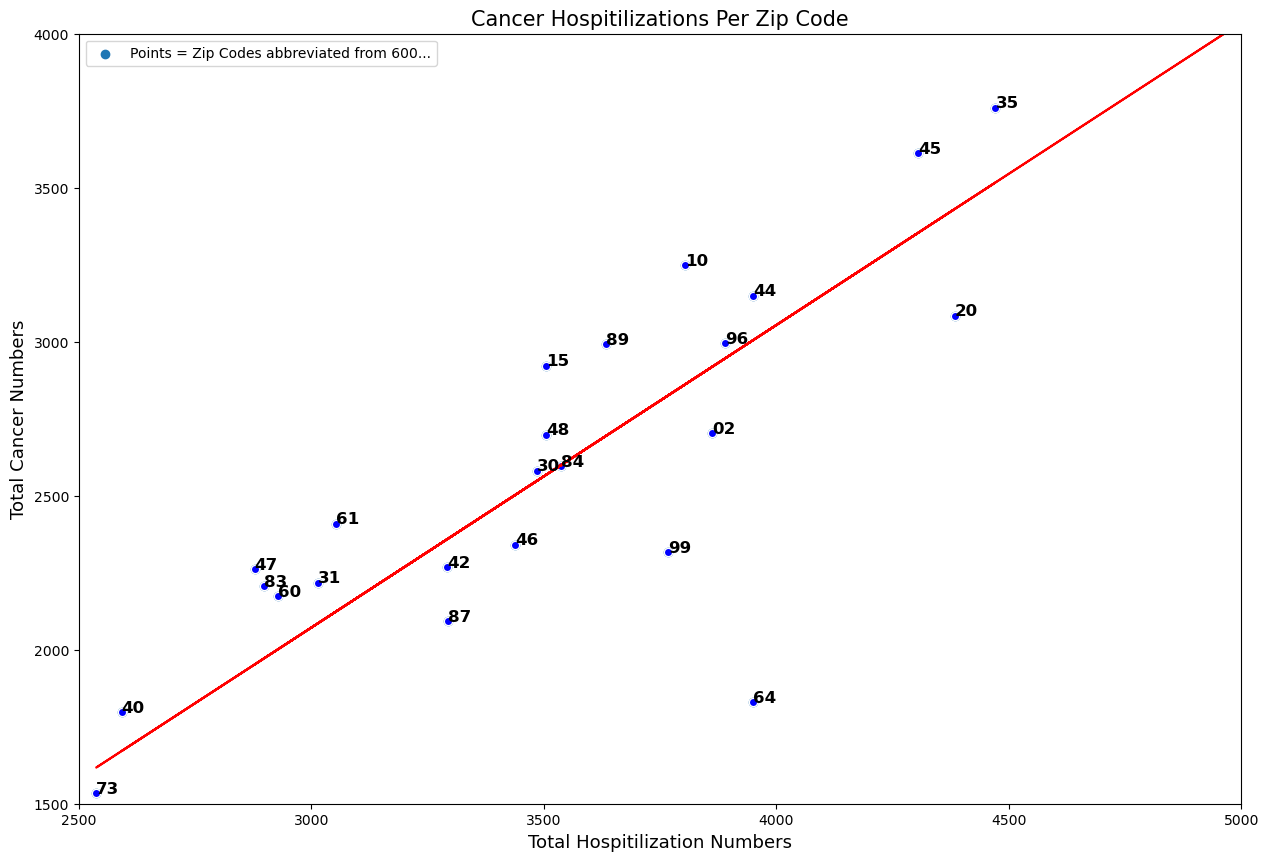

In [14]:
## Convert to floats and store Total Hospitilization and All_Cancer as x and y values
x_values = list(merge_df["Total Hospitilization"].astype("float"))
y_values = list(merge_df["All_Cancer"].astype("float"))


fig, ax = plt.subplots(figsize = (15, 10))

# Plot scatter plot
ax.scatter(x_values,y_values)
for i, txt in enumerate(list(merge_df ['Abbreviated ZIP'])):
    ax.annotate(txt, (list(x_values)[i], list(y_values)[i]), fontsize = 12, fontweight = "bold")

plt.scatter(x_values, y_values, s=7)


# Label plot
plt.xlabel('Total Hospitilization Numbers', fontsize = 13)
plt.ylabel('Total Cancer Numbers',fontsize = 13)
plt.title ('Cancer Hospitilizations Per Zip Code',fontsize = 15)
plt.scatter(merge_df["Total Hospitilization"], merge_df["All_Cancer"], marker="o", facecolors="blue", edgecolors="white")

plt.xlim(2500,5000)
plt.ylim(1500,4000)

# Linear regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = merge_df["Total Hospitilization"] * slope + intercept

line_eq = "y = "+ str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


print(f"R squared: {rvalue**2}")


plt.legend(["Points = Zip Codes abbreviated from 600..."])

plt.savefig('Cancer_Hospitilizations_Per_Zip_Code')



![alt text](Cancer_Hospitilizations_Per_Zip_Code.png)